<a href="https://colab.research.google.com/github/varun-dubagunta/DS/blob/main/hair_type_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import zipfile

zipped_folder = zipfile.ZipFile('/content/archive (6).zip', 'r') #Extracting Zip file taken from Kaggle: link(https://www.kaggle.com/datasets/kavyasreeb/hair-type-dataset)
zipped_folder.extractall('/content/data')
zipped_folder.close()


In [3]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
root_folder = '/content/data/data'

y_labels = [str(folder_name) for folder_name in os.listdir(root_folder) ] #create list of labels using folders provided in data folder
training_array = []
def populate_training_data(training_array):
  for folder in os.listdir(root_folder):
      folder_path = os.path.join(root_folder, folder)
      print(folder_path)
      for img in os.listdir(folder_path):
          if '.png' in img: #handling png files
            continue
          file_path = os.path.join(folder_path, img)
          img_array = cv2.imread(file_path, cv2.imread('RGB'))
          if img_array is None or img_array is object: #handling empty or non-image files(encountered gif in dataset during runtime)
            print(f"Error loading image: {file_path}")
            continue
          img_array = cv2.resize(img_array, (200,200))
          img_array = img_array/255
          training_array.append([img_array, y_labels.index(folder)])
populate_training_data(training_array)

/content/data/data/curly
Error loading image: /content/data/data/curly/rs_1080x1080-200330130638-1080-ariana-grande-curly-hair-instagram-am-033020.gif
/content/data/data/dreadlocks
/content/data/data/kinky
/content/data/data/Wavy
/content/data/data/Straight


In [49]:
print(y_labels) #checking that all categories are covered

['curly', 'dreadlocks', 'kinky', 'Wavy', 'Straight']


 4: corresponds to Straight


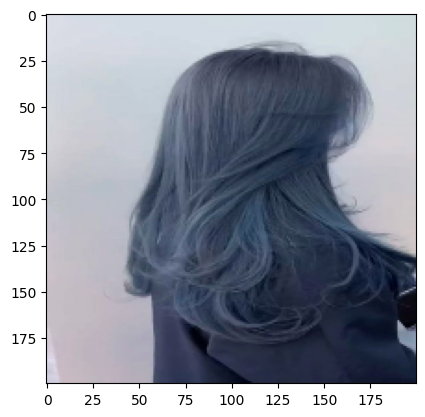

In [20]:
print(f" {training_array[1954][1]}: corresponds to {y_labels[training_array[1954][1]]}") #checking whether pictures are correctly coupled with hair type

plt.imshow(training_array[1954][0], cmap = 'gray')


In [24]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

x_label = np.array([training_array[i][0] for i in range(len(training_array))])
y_label = np.array([training_array[i][1] for i in range(len(training_array))])

y_label = to_categorical(y_label)



model = Sequential()
model.add(Conv2D(32,(3,3),input_shape = x_label.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(32))

model.add(Dense(5))
model.add(Activation('sigmoid'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(x_label,y_label,epochs=3)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/3
62/62 ━━━━━━━━━━━━━━━━━━━━ 105s 2s/step - accuracy: 0.2868 - loss: 1.6168
Epoch 2/3
62/62 ━━━━━━━━━━━━━━━━━━━━ 143s 2s/step - accuracy: 0.4932 - loss: 1.2623
Epoch 3/3
62/62 ━━━━━━━━━━━━━━━━━━━━ 141s 2s/step - accuracy: 0.6460 - loss: 0.9631


In [25]:
model.save('hair_type.keras')

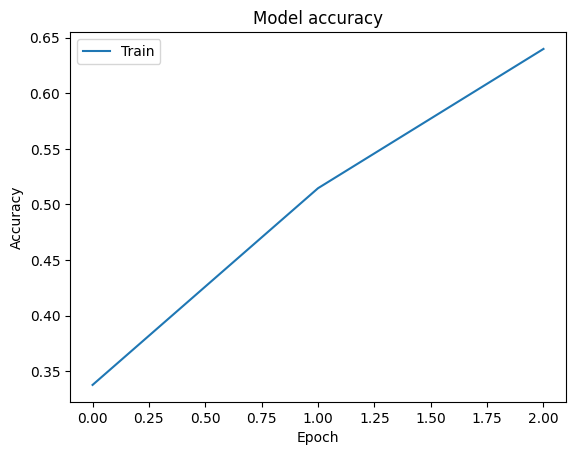

In [26]:
plt.plot(model.history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


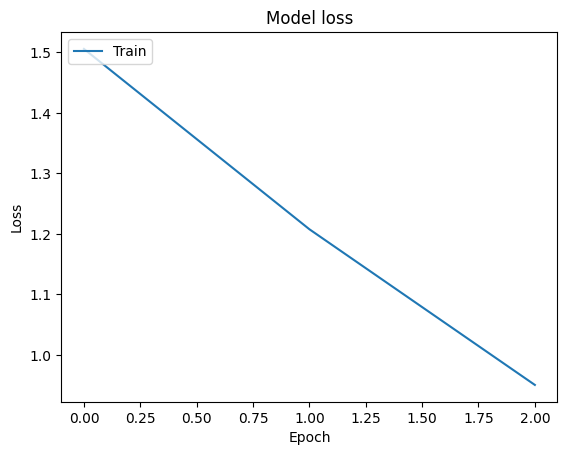

In [27]:
plt.plot(model.history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show( )

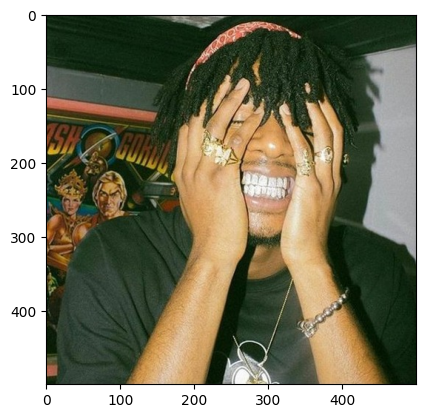

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
this hair type is: dreadlocks


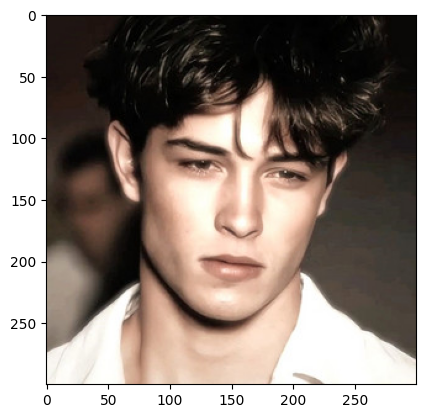

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
this hair type is: Wavy


In [46]:
hair_type_model = tf.keras.models.load_model('/content/hair_type.keras')

test_img = cv2.imread('/content/dreads_test.jpg')
image_rgb = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.show()
test_img = cv2.resize(test_img, (200,200))

test_img = test_img/255

prediction = hair_type_model.predict(np.array([test_img])) #hair used is starter dreads: hard to classify between dreads and kinky
print(f"this hair type is: {y_labels[np.argmax(prediction)]}") #NOTE: model correctly estimated that hair might be kinky or dreads as well




test_img_2 = cv2.imread('/content/wavy_test.jpg')
image_rgb_2 = cv2.cvtColor(test_img_2, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb_2)
plt.show()
test_img_2 = cv2.resize(test_img_2, (200,200))
test_img_2 = test_img_2/255

prediction_2 = hair_type_model.predict(np.array([test_img_2])) #hair used is wavy: easy to classify

print(f"this hair type is: {y_labels[np.argmax(prediction_2)]}")


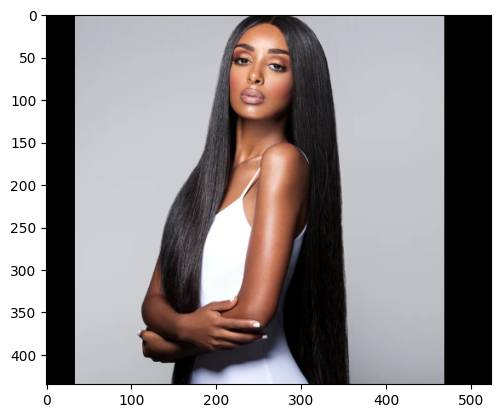

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
this hair type is: Straight


In [48]:

test_img_3 = cv2.imread('/Screenshot 2025-01-03 165427.png',cv2.imread('png'))
image_rgb_3 = cv2.cvtColor(test_img_3, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb_3)
plt.show()
test_img = cv2.resize(test_img, (200,200))

test_img_3 = cv2.resize(test_img_3, (200,200))
test_img_3 = test_img_3/255

prediction_3 = hair_type_model.predict(np.array([test_img_3])) #hair used is easy to identify, long straight hair

print(f"this hair type is: {y_labels[np.argmax(prediction_3)]}")